# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
import statsmodels.stats.weightstats as ssw
import seaborn as sns

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# в качестве предмета исследования я взял распределение genhyperbolic
# например вот такое распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genhyperbolic.html#scipy.stats.genhyperbolic
p, a, b = 0.5, 1.5, -0.5
genhyperbolic_rv = sts.genhyperbolic(p, a, b)
sample = genhyperbolic_rv.rvs(100)
sample

array([ 3.13849646e-01, -7.18965184e-01, -1.45242824e+00, -3.14037757e+00,
       -9.49792249e-01, -6.16509624e-01,  3.98817264e-01, -1.19281718e-01,
       -9.92830161e-01, -4.46845949e-01, -4.66551585e-01, -1.51003572e+00,
        7.95434666e-01, -1.83965460e+00,  4.96400160e-01, -1.12075300e+00,
       -2.09358769e+00, -7.51651881e-01, -6.84655870e-01,  1.33910795e-01,
       -1.31792405e+00,  7.32266416e-01,  3.90729199e-01, -1.70641035e+00,
        1.45732531e-01, -1.12502257e+00,  3.23287399e-01, -2.17395556e+00,
       -2.92171081e-01, -4.91303098e-01, -2.21534423e-01, -2.92897459e-01,
       -7.48117767e-01,  7.65704633e-02, -1.55864018e+00, -3.85187570e-01,
        2.45946691e-01,  3.49636571e-02, -1.03949506e+00, -4.45823765e-01,
        1.86988492e-01, -5.67781623e-02,  4.15925092e-01,  9.69181901e-02,
       -8.07054204e-01, -5.55784674e-01, -2.85366514e-02, -5.38541001e-01,
       -9.14402513e-02, -6.39186089e-01, -1.20799475e+00, -1.77588855e-01,
        8.19740104e-02, -

In [3]:
sample.dtype

dtype('float64')

In [4]:
real_mean = genhyperbolic_rv.mean() # настоящее среднее случайной величины

In [5]:
real_var = genhyperbolic_rv.var() # настоящая дисперсия случайной величины

### Постройте гистограмму выборки и теоретическую плотность распределения

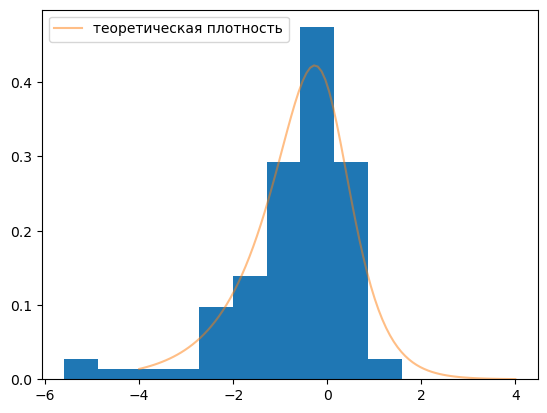

In [6]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = genhyperbolic_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [7]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

-0.6717727146120498
1.4264901701015325


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

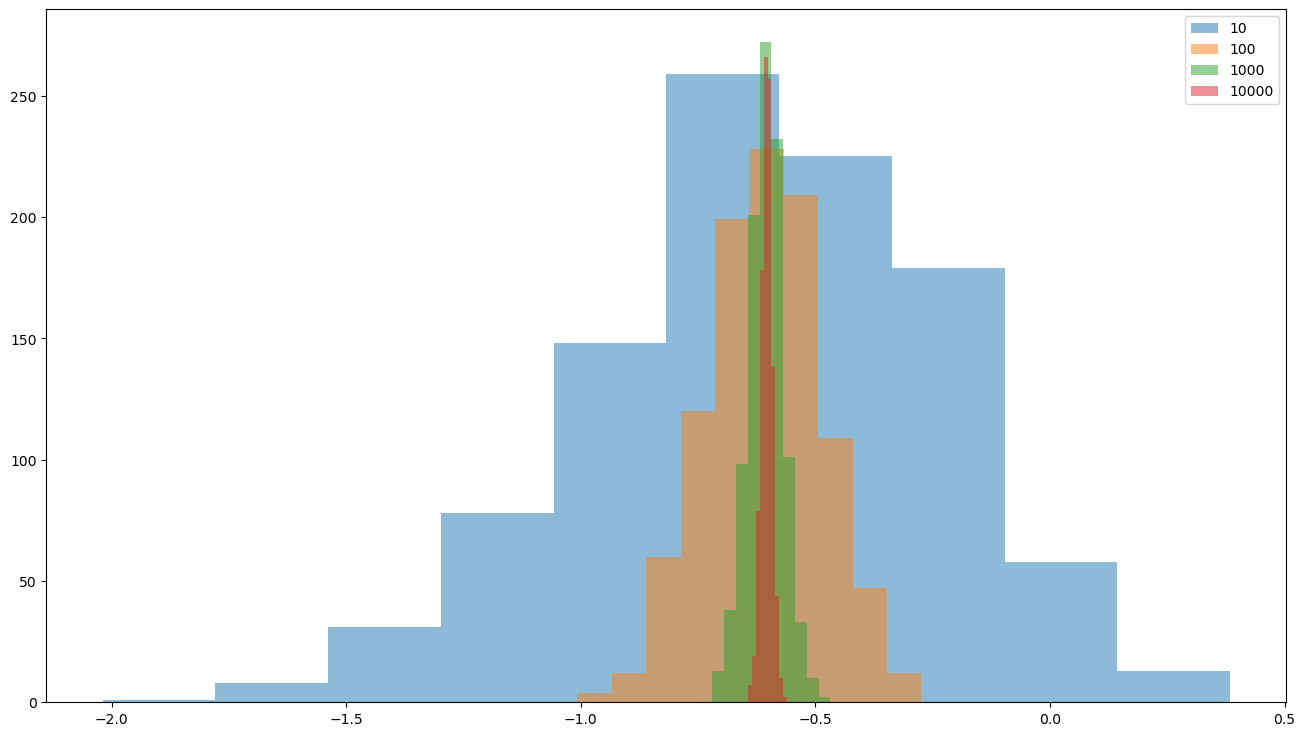

In [8]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(genhyperbolic_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:** Апроксимация распределения выборочного среднего работает хорошо

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [9]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [10]:
# выделим в отдельный датафрейм столбцы total day calls и churn
tdc_df = df[['total day calls', 'churn' ]]
tdc_df

,total day calls,churn
0,110,False
1,123,False
2,114,False
3,71,False
4,113,False
...,...,...
3328,77,False
3329,57,False
3330,109,False
3331,105,False


In [11]:
# среднее значение по total_day_calls
tdc_means = tdc_df.groupby('churn')['total day calls'].mean()
tdc_means

churn
False    100.283158
True     101.335404
Name: total day calls, dtype: float64

In [12]:
# дисперсия
tdc_variance = tdc_df.groupby('churn')['total day calls'].var(ddof=1)
tdc_variance

churn
False    392.085817
True     465.795985
Name: total day calls, dtype: float64

In [13]:
# стандартное отклонение
tdc_std = tdc_df.groupby('churn')['total day calls'].std()
tdc_std

churn
False    19.801157
True     21.582307
Name: total day calls, dtype: float64

In [14]:
# кол-во значений
tdc_count = tdc_df.groupby('churn')['total day calls'].count()
count_false = tdc_count[0]
print(count_false)
count_true = tdc_count[1]
print(count_true)

2850
483


In [15]:
# Разобьем наш датафрейм tdc_df на два с соответствующими значениями столбца churn
tdc_df_false = tdc_df['total day calls'].loc[(tdc_df['churn']==False)]
tdc_df_true = tdc_df['total day calls'].loc[(tdc_df['churn']==True)]

In [16]:
# Доверительный интервал для среднего по цпт интервальная оценка
a_false = sts.norm.interval(confidence=0.95, loc=np.mean(tdc_df_false, axis=0), scale=np.std(tdc_df_false, ddof=1)/np.sqrt(len(tdc_df_false)-1))
a_true = sts.norm.interval(confidence=0.95, loc=np.mean(tdc_df_true, axis=0), scale=np.std(tdc_df_true, ddof=1)/np.sqrt(len(tdc_df_true)-1))
print("Доверительный интервал для среднего по цпт интервальная оценка")
print(f"Значение False: дов. инт. от: {a_false[0]}, дов. инт. до: {a_false[1]}")
print(f"Значение True: дов. инт. от: {a_true[0]}, дов. инт. до: {a_true[1]}")
print('-'*80)

# Доверительный интервал для среднего по цпт методом _zconfint_generic
b_false = ssw._zconfint_generic(np.mean(tdc_df_false, axis=0),  np.std(tdc_df_false, ddof=1), alpha=0.95, alternative='two-sided')
b_true = ssw._zconfint_generic(np.mean(tdc_df_true, axis=0),  np.std(tdc_df_true, ddof=1), alpha=0.95, alternative='two-sided')
print("Доверительный интервал для среднего по цпт методом _zconfint_generic")
print(f"Значение False: дов. инт. от: {b_false[0]}, дов. инт. до: {b_false[1]}")
print(f"Значение True: дов. инт. от: {b_true[0]}, дов. инт. до: {b_true[1]}")

Доверительный интервал для среднего по цпт интервальная оценка
Значение False: дов. инт. от: 99.55606076109109, дов. инт. до: 101.0102550283826
Значение True: дов. инт. от: 99.40866670589261, дов. инт. до: 103.26214074752355
--------------------------------------------------------------------------------
Доверительный интервал для среднего по цпт методом _zconfint_generic
Значение False: дов. инт. от: 99.04149114274125, дов. инт. до: 101.52482464673244
Значение True: дов. инт. от: 99.98204678079553, дов. инт. до: 102.68876067262063


In [17]:
# Добавим наши данные по доверительным интервалам в один датафрейм
data1 = {'a_False': [a_false[0], a_false[1]],
        'a_True': [a_true[0], a_true[1]],
        'b_False': [b_false[0], b_false[1]],
        'b_True': [b_true[0], b_true[1]]}
df1 = pd.DataFrame(data1) 
df1

,a_False,a_True,b_False,b_True
0,99.556061,99.408667,99.041491,99.982047
1,101.010255,103.262141,101.524825,102.688761


c:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


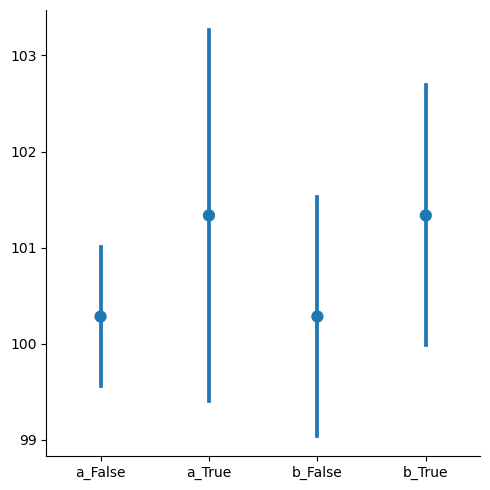

In [18]:
# Построим (для наглядности)график с доверительными интервалами по датафрейму
sns.catplot(kind='point',join=False, data=df1)

Доверительные интервалы для среднего значения total day calls, рассчитанные с помощью интервальной оценки, и рассчитанные методом zconfint_generic достаточно сильно различаются. Если в первом случае доверительный интервал для значения False почти в два раза меньше доверительного интервала для значения True, и доверительный интервал для значения False полностью "лежит" внутри доверительного интервала для значения True, то во втором случае оба доверительных интервала сопоставимы по длине и перекрываются примерно наполовину.